In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [89]:
df_train = pd.read_csv('customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv')
df = pd.concat([df_train, df_test])

## Preprocessing

In [90]:
# Dropping "Customer ID" column as it is not needed
df.drop(columns='CustomerID', inplace=True)
df_test.drop(columns='CustomerID', inplace=True)
df_train.drop(columns='CustomerID', inplace=True)

#Dropping all invalid rows (NaN)
df.dropna(how='all', inplace=True)
df_test.dropna(how='all', inplace=True)
df_train.dropna(how='all', inplace=True)

#One-Hot encoding
df_train = pd.get_dummies(df_train, columns=['Gender', 'Subscription Type', 'Contract Length'])
df_test = pd.get_dummies(df_test, columns=['Gender', 'Subscription Type', 'Contract Length'])

         Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       30.0    39.0             14.0            5.0           18.0   
1       65.0    49.0              1.0           10.0            8.0   
2       55.0    14.0              4.0            6.0           18.0   
3       58.0    38.0             21.0            7.0            7.0   
4       23.0    32.0             20.0            5.0            8.0   
...      ...     ...              ...            ...            ...   
440828  42.0    54.0             15.0            1.0            3.0   
440829  25.0     8.0             13.0            1.0           20.0   
440830  26.0    35.0             27.0            1.0            5.0   
440831  28.0    55.0             14.0            2.0            0.0   
440832  31.0    48.0             20.0            1.0           14.0   

        Total Spend  Last Interaction  Churn  Gender_Female  Gender_Male  \
0            932.00              17.0    1.0           True        Fals

## Exploratory Data Analysis

Text(0.5, 1.0, 'Contract Length')

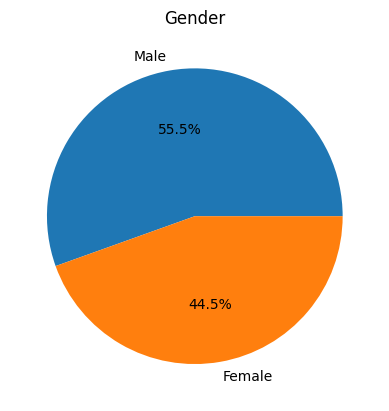

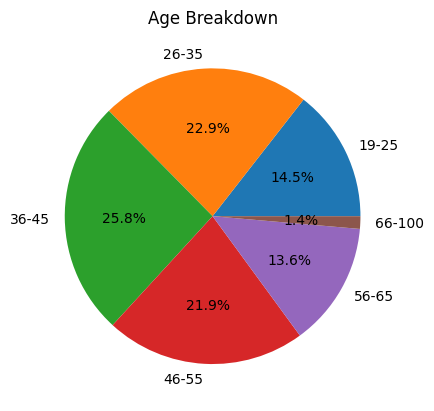

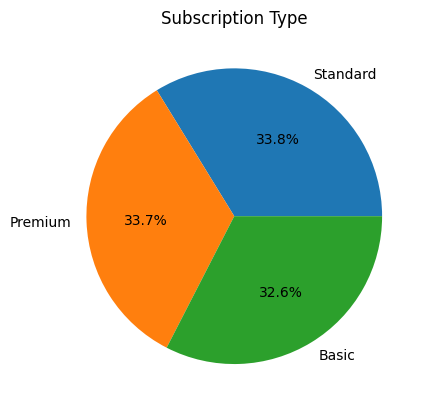

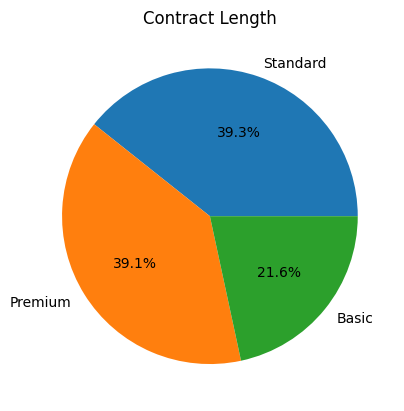

In [91]:
#Gender breakdown
gender_counts = df['Gender'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
ax.set_title('Gender')

#Age breakdown
age_group_bins = [18, 25, 35, 45, 55, 65, 100]
age_group_labels = ['19-25', '26-35', '36-45', '46-55', '56-65', '66-100'] #Age range 0-18 doesn't exist in the dataset
age_group = pd.cut(df['Age'], bins=age_group_bins, labels=age_group_labels, right=False)
age_group_counts = age_group.value_counts().sort_index()

fig, ax = plt.subplots()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Age Breakdown')

#Subscription type breakdown
subscription_type_counts = df['Subscription Type'].value_counts()
fig, ax = plt.subplots()
ax.pie(subscription_type_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
ax.set_title('Subscription Type')

#Contract length breakdwon
contract_length_counts = df['Contract Length'].value_counts()
fig, ax = plt.subplots()
ax.pie(contract_length_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
ax.set_title('Contract Length')

## Model Training

Accuracy: 1.0


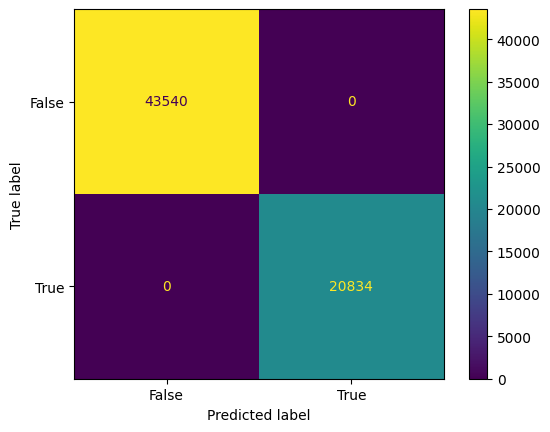

In [92]:
#NOTE: Data is already split into train and test

x_test = df_test.iloc[:, 0:-1]
y_true = df_test.iloc[:, -1]
x_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]


lregression = LogisticRegression(max_iter=1000)
lregression.fit(x_train, y_train)

y_pred = lregression.predict(x_test)

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

display = ConfusionMatrixDisplay.from_predictions(
    y_true,
    y_pred,
)
plt.show()